<a href="https://colab.research.google.com/github/Chayan009185/Python-basics-/blob/main/Statistics_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Theory Questions and Answers



1. What is hypothesis testing in statistics?

Hypothesis testing is a statistical method used to determine whether there is enough evidence in a sample to support a certain claim about a population.



2. What is the null hypothesis, and how does it differ from the alternative hypothesis?

The null hypothesis () states that there is no effect or difference, while the alternative hypothesis () suggests that there is a significant effect or difference.



3. What is the significance level in hypothesis testing, and why is it important?

The significance level (), usually 0.05 or 5%, is the probability of rejecting the null hypothesis when it is actually true. It helps control the likelihood of making a Type I error.



4. What does a P-value represent in hypothesis testing?

The P-value measures the probability of obtaining results as extreme as the observed results, assuming the null hypothesis is true.



5. How do you interpret the P-value in hypothesis testing?

A small P-value () suggests strong evidence against , leading to its rejection. A large P-value () means insufficient evidence to reject .



6. What are Type 1 and Type 2 errors in hypothesis testing?

Type I error: Rejecting  when it is actually true.

Type II error: Failing to reject  when  is actually true.



7. What is the difference between a one-tailed and a two-tailed test in hypothesis testing?

One-tailed tests check for an effect in one direction (e.g., greater than).

Two-tailed tests check for an effect in both directions (e.g., different from).



8. What is the Z-test, and when is it used in hypothesis testing?

A Z-test is used when the sample size is large () and the population variance is known.



9. How do you calculate the Z-score, and what does it represent in hypothesis testing?



It represents how many standard deviations a data point is from the mean.



10. What is the T-distribution, and when should it be used instead of the normal distribution?

The T-distribution is used when the sample size is small () and the population variance is unknown.



11. What is the difference between a Z-test and a T-test?

A Z-test is used for large samples with known variance, while a T-test is used for small samples with unknown variance.



12. What is the T-test, and how is it used in hypothesis testing?

A T-test compares sample means to determine if they are significantly different.



13. What is the relationship between Z-test and T-test in hypothesis testing?

Both test for differences in means, but Z-tests are for large samples, while T-tests are for small samples.



14. What is a confidence interval, and how is it used to interpret statistical results?

A confidence interval estimates a range within which a population parameter is likely to fall.



15. What is the margin of error, and how does it affect the confidence interval?

The margin of error quantifies uncertainty in an estimate. A larger margin means a wider confidence interval.



16. How is Bayes' Theorem used in statistics, and what is its significance?

Bayes’ Theorem updates probabilities based on new evidence, useful in decision-making and machine learning.



17. What is the Chi-square distribution, and when is it used?

The Chi-square distribution is used for categorical data analysis, such as goodness-of-fit and independence tests.



18. What is the Chi-square goodness of fit test, and how is it applied?

It tests if an observed distribution matches an expected distribution.



19. What is the F-distribution, and when is it used in hypothesis testing?

The F-distribution is used in variance comparison tests like ANOVA.



20. What is an ANOVA test, and what are its assumptions?

ANOVA (Analysis of Variance) compares means of three or more groups. Assumptions include normality, independence, and equal variances.



21. What are the different types of ANOVA tests?

One-way ANOVA (one factor), Two-way ANOVA (two factors), and Repeated Measures ANOVA.



22. What is the F-test, and how does it relate to hypothesis testing?

The F-test compares variances between groups, used in ANOVA and regression analysis.

In [ ]:
#Practical Questions and Answers

1. Perform a Z-test for comparing a sample mean to a known population mean

We can use scipy.stats for hypothesis testing. Here’s how you can do a one-sample

In [1]:

import numpy as np
from scipy import stats

# Sample data (randomly generated)
np.random.seed(42)
sample = np.random.normal(loc=50, scale=10, size=30)  # Mean=50, Std=10, n=30

# Population parameters
population_mean = 52
population_std = 10  # Known population standard deviation

# Perform one-sample Z-test
z_score = (np.mean(sample) - population_mean) / (population_std / np.sqrt(len(sample)))
p_value = stats.norm.sf(abs(z_score)) * 2  # Two-tailed test

print(f"Z-score: {z_score:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: The sample mean is significantly different from the population mean.")
else:
    print("Fail to reject the null hypothesis: No significant difference found.")

Z-score: -2.126
P-value: 0.034
Reject the null hypothesis: The sample mean is significantly different from the population mean.


2. Simulate random data and perform hypothesis testing (Z-test)

In [2]:
# Generate random data
sample_data = np.random.normal(loc=55, scale=12, size=50)  # Mean=55, Std=12, n=50

# Calculate sample mean and standard deviation
sample_mean = np.mean(sample_data)
sample_std = np.std(sample_data, ddof=1)  # Sample standard deviation

# Perform one-sample Z-test
z_score, p_value = stats.ttest_1samp(sample_data, popmean=50)  # Using T-test for unknown population std

print(f"Z-score: {z_score:.3f}")
print(f"P-value: {p_value:.3f}")

Z-score: 2.350
P-value: 0.023


3. Implement a one-sample Z-test using Python

This is the same as task 1 but can be written as a function:

In [3]:
def one_sample_z_test(sample, pop_mean, pop_std):
    z_score = (np.mean(sample) - pop_mean) / (pop_std / np.sqrt(len(sample)))
    p_value = stats.norm.sf(abs(z_score)) * 2
    return z_score, p_value

# Example usage
z, p = one_sample_z_test(sample, 52, 10)
print(f"Z-score: {z:.3f}, P-value: {p:.3f}")

Z-score: -2.126, P-value: 0.034


4. Perform a Two-Tailed Z-test and Visualize the Decision Region

We plot the normal distribution curve to visualize the decision regions for a given significance level ().

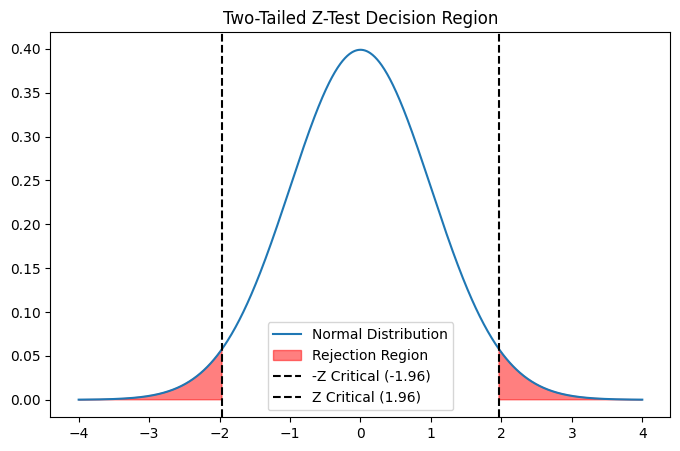

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define critical Z-scores for 95% confidence interval (two-tailed test)
z_critical = stats.norm.ppf(1 - 0.05/2)  # 1.96 for 95% confidence

# Generate normal distribution curve
x = np.linspace(-4, 4, 1000)
y = stats.norm.pdf(x)

# Plot the distribution
plt.figure(figsize=(8, 5))
plt.plot(x, y, label='Normal Distribution')

# Shade rejection regions
plt.fill_between(x, y, where=(x < -z_critical) | (x > z_critical), color='red', alpha=0.5, label='Rejection Region')

# Mark critical values
plt.axvline(-z_critical, color='black', linestyle="--", label=f'-Z Critical (-{z_critical:.2f})')
plt.axvline(z_critical, color='black', linestyle="--", label=f'Z Critical ({z_critical:.2f})')

plt.title("Two-Tailed Z-Test Decision Region")
plt.legend()
plt.show()

5. Calculate and Visualize Type 1 and Type 2 Errors

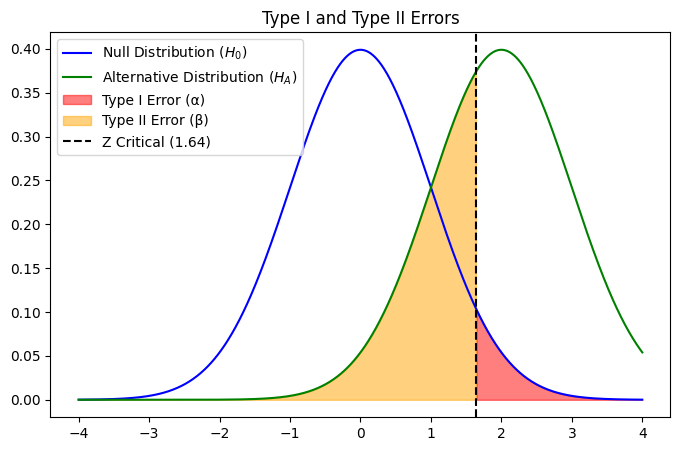

In [5]:
def plot_type1_type2():
    x = np.linspace(-4, 4, 1000)
    null_dist = stats.norm.pdf(x, 0, 1)
    alt_dist = stats.norm.pdf(x, 2, 1)

    plt.figure(figsize=(8,5))
    plt.plot(x, null_dist, label="Null Distribution ($H_0$)", color='blue')
    plt.plot(x, alt_dist, label="Alternative Distribution ($H_A$)", color='green')

    # Critical region (Type I error)
    z_critical = stats.norm.ppf(1 - 0.05)
    plt.fill_between(x, null_dist, where=(x > z_critical), color='red', alpha=0.5, label="Type I Error (α)")

    # Type II error region
    plt.fill_between(x, alt_dist, where=(x < z_critical), color='orange', alpha=0.5, label="Type II Error (β)")

    plt.axvline(z_critical, color='black', linestyle="--", label=f'Z Critical ({z_critical:.2f})')
    plt.legend()
    plt.title("Type I and Type II Errors")
    plt.show()

plot_type1_type2()

6. Perform an Independent T-test

An independent T-test compares two

In [6]:
from scipy.stats import ttest_ind

# Generate random data for two independent samples
group1 = np.random.normal(60, 10, 30)  # Sample 1
group2 = np.random.normal(55, 10, 30)  # Sample 2

# Perform independent T-test
t_stat, p_value = ttest_ind(group1, group2)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation
if p_value < 0.05:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference.")

T-statistic: 2.055
P-value: 0.044
Reject the null hypothesis: The means are significantly different.


7. Perform a Paired Sample T-test

A paired T-test is used when samples are dependent (e.g., before-after treatment).

In [ ]:
from scipy.stats import ttest_rel

# Generate paired sample data (before vs after)
before = np.random.normal(70, 10, 30)
after = before + np.random.normal(5, 5, 30)  # Adding a small effect

# Perform paired T-test
t_stat, p_value = ttest_rel(before, after)

print(f"T-statistic: {t_stat:.3f}")
print(f"P-value: {p_value:.3f}")

8. Perform an ANOVA Test (One-Way ANOVA)

ANOVA compares means across multiple groups.

In [7]:
from scipy.stats import f_oneway

# Generate three sample groups
group1 = np.random.normal(50, 10, 30)
group2 = np.random.normal(55, 10, 30)
group3 = np.random.normal(60, 10, 30)

# Perform ANOVA
f_stat, p_value = f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.3f}")

if p_value < 0.05:
    print("Reject the null hypothesis: At least one group mean is different.")
else:
    print("Fail to reject the null hypothesis: No significant difference among groups.")

F-statistic: 9.769
P-value: 0.000
Reject the null hypothesis: At least one group mean is different.


9. Perform a Chi-Square Test for Independence

Chi-square tests check if two categorical variables are related.

In [8]:
import pandas as pd
from scipy.stats import chi2_contingency

# Create a contingency table
data = np.array([[30, 10], [25, 15]])
df = pd.DataFrame(data, columns=['Category A', 'Category B'], index=['Group 1', 'Group 2'])

# Perform Chi-square test
chi2, p, dof, expected = chi2_contingency(data)

print(f"Chi-square Statistic: {chi2:.3f}")
print(f"P-value: {p:.3f}")

Chi-square Statistic: 0.931
P-value: 0.335


10. Bayesian Inference using Bayes' Theorem

In [9]:
def bayes_theorem(prior_A, prob_B_given_A, prob_B):
    return (prob_B_given_A * prior_A) / prob_B

# Example: Disease diagnosis
prior_disease = 0.01  # 1% of the population has the disease
prob_positive_given_disease = 0.95  # Test detects 95% of cases
prob_positive = 0.05  # 5% false positives in general

posterior = bayes_theorem(prior_disease, prob_positive_given_disease, prob_positive)

print(f"Probability of having the disease given a positive test: {posterior:.3f}")

Probability of having the disease given a positive test: 0.190


11. Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process.

In [10]:
def bayes_theorem(p_a, p_b_given_a, p_b_given_not_a):
    p_not_a = 1 - p_a
    p_b = p_b_given_a * p_a + p_b_given_not_a * p_not_a
    p_a_given_b = (p_b_given_a * p_a) / p_b
    return p_a_given_b

# Example usage
p_a = 0.02
p_b_given_a = 0.85
p_b_given_not_a = 0.15
print("P(A|B):", bayes_theorem(p_a, p_b_given_a, p_b_given_not_a))

P(A|B): 0.10365853658536588


12. Perform a Chi-square test for independence between two categorical variables in Python.

In [11]:
import numpy as np
from scipy.stats import chi2_contingency

# Example data
data = np.array([[10, 20, 30], [6, 9, 17]])
chi2, p, dof, expected = chi2_contingency(data)
print("Chi-square statistic:", chi2)
print("P-value:", p)

Chi-square statistic: 0.27157465150403504
P-value: 0.873028283380073


13. Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data.

In [12]:
def expected_frequencies(observed):
    row_totals = observed.sum(axis=1)
    col_totals = observed.sum(axis=0)
    grand_total = observed.sum()
    expected = np.outer(row_totals, col_totals) / grand_total
    return expected

# Example usage
observed = np.array([[10, 20, 30], [6, 9, 17]])
print("Expected Frequencies:\n", expected_frequencies(observed))

Expected Frequencies:
 [[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]


14: Perform a goodness-of-fit test to compare observed data with an expected distribution.

In [19]:
import scipy.stats as stats

observed = [50, 30, 20]  # Example observed values
expected = [40, 40, 20]  # Expected values (e.g., uniform distribution)

chi2_stat, p_value = stats.chisquare(f_obs=observed, f_exp=expected)
print(f"Chi-Square Statistic: {chi2_stat}, P-Value: {p_value}")

Chi-Square Statistic: 5.0, P-Value: 0.0820849986238988


15: Simulate and visualize the Chi-Square distribution.

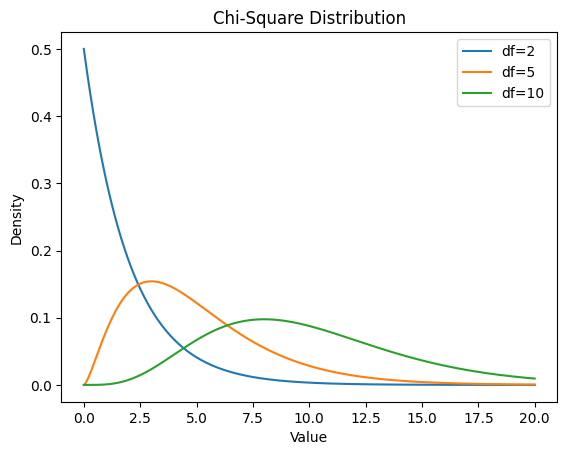

In [18]:
import numpy as np
import matplotlib.pyplot as plt

df_values = [2, 5, 10]  # Different degrees of freedom
x = np.linspace(0, 20, 1000)

for df in df_values:
    plt.plot(x, stats.chi2.pdf(x, df), label=f'df={df}')

plt.legend()
plt.title("Chi-Square Distribution")
plt.xlabel("Value")
plt.ylabel("Density")
plt.show()

16: Compare the variances of two samples using an F-test.

In [17]:
sample1 = np.random.normal(50, 10, 100)  # Mean 50, Std Dev 10, Sample Size 100
sample2 = np.random.normal(50, 15, 100)  # Mean 50, Std Dev 15, Sample Size 100

f_stat, p_value = stats.levene(sample1, sample2)
print(f"F-Statistic: {f_stat}, P-Value: {p_value}")

F-Statistic: 13.699882580446511, P-Value: 0.00027794120029381417


17 & 18: One-way ANOVA to compare means of multiple groups.

group1 = np.random.normal(50, 10

In [16]:
group1 = np.random.normal(50, 10, 30)
group2 = np.random.normal(55, 10, 30)
group3 = np.random.normal(60, 10, 30)

f_stat, p_value = stats.f_oneway(group1, group2, group3)
print(f"ANOVA F-Statistic: {f_stat}, P-Value: {p_value}")

ANOVA F-Statistic: 5.756325119692044, P-Value: 0.004489369638057638


19: Check ANOVA assumptions (normality, independence, equal variance).

from scipy.stats import shapiro

In [15]:
from scipy.stats import shapiro

print("Shapiro Test for Normality:")
for group in [group1, group2, group3]:
    print(shapiro(group))

Shapiro Test for Normality:
ShapiroResult(statistic=np.float64(0.9565991622095713), pvalue=np.float64(0.25295724620535553))
ShapiroResult(statistic=np.float64(0.9434318990320312), pvalue=np.float64(0.11254817408799928))
ShapiroResult(statistic=np.float64(0.9345472861937452), pvalue=np.float64(0.06492023544593056))


20: Two-way ANOVA (interaction between two factors).

In [14]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
import pandas as pd

df = pd.DataFrame({
    'Score': np.concatenate([group1, group2, group3]),
    'Factor1': ['A'] * 30 + ['B'] * 30 + ['C'] * 30,
    'Factor2': np.random.choice(['X', 'Y'], 90)
})

model = ols('Score ~ Factor1 + Factor2 + Factor1:Factor2', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                      sum_sq    df         F    PR(>F)
Factor1          1960.587245   2.0  9.852042  0.000143
Factor2            26.587613   1.0  0.267208  0.606569
Factor1:Factor2   295.327317   2.0  1.484034  0.232604
Residual         8358.131486  84.0       NaN       NaN


 21: Visualizing the F-distribution.

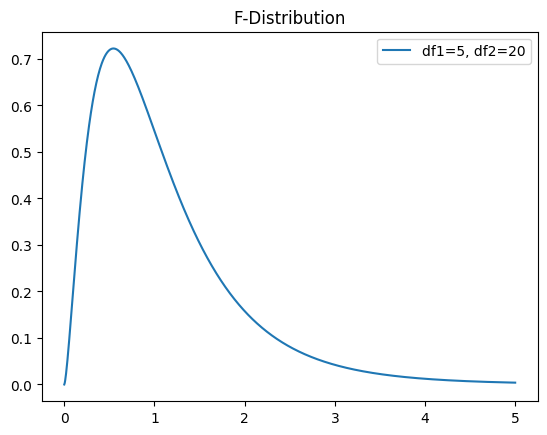

In [20]:
x = np.linspace(0, 5, 1000)
plt.plot(x, stats.f.pdf(x, 5, 20), label="df1=5, df2=20")
plt.legend()
plt.title("F-Distribution")
plt.show()

22: Boxplot visualization for ANOVA results.

F-statistic: 45.806296913430025
P-value: 2.575799905640364e-14
Reject the null hypothesis: There are significant differences between the group means.


<ipython-input-24-9b179395101e>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Group', y='Values', data=data, palette='Set3')


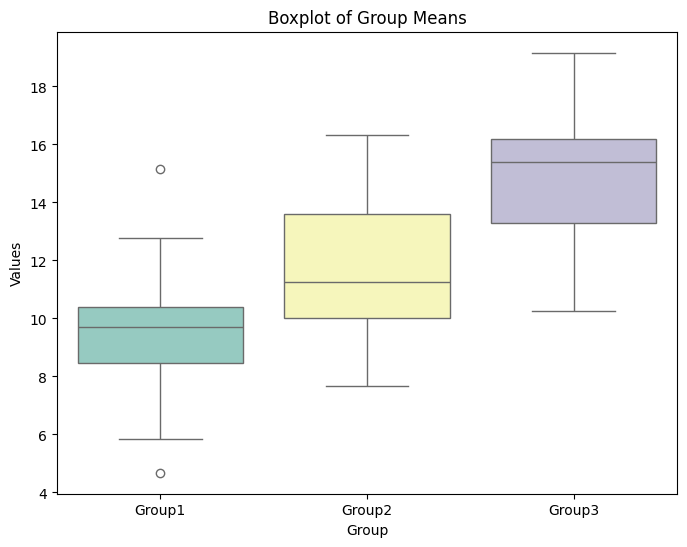

In [24]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for three groups
group1 = np.random.normal(10, 2, 30)  # Mean = 10, Std = 2, Sample size = 30
group2 = np.random.normal(12, 2, 30)  # Mean = 12, Std = 2, Sample size = 30
group3 = np.random.normal(15, 2, 30)  # Mean = 15, Std = 2, Sample size = 30

# Combine into a DataFrame for easier visualization
data = pd.DataFrame({
    'Values': np.concatenate([group1, group2, group3]),
    'Group': ['Group1'] * 30 + ['Group2'] * 30 + ['Group3'] * 30
})

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(group1, group2, group3)

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis: There are significant differences between the group means.")
else:
    print("Fail to reject the null hypothesis: No significant differences between the group means.")

# Create a boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Group', y='Values', data=data, palette='Set3')
plt.title('Boxplot of Group Means')
plt.xlabel('Group')
plt.ylabel('Values')
plt.show()

23: Generate normal data and test means.

In [22]:
data = np.random.normal(50, 10, 100)
t_stat, p_value = stats.ttest_1samp(data, 50)  # Testing mean = 50
print(f"T-Test Statistic: {t_stat}, P-Value: {p_value}")

T-Test Statistic: 0.20190674071120873, P-Value: 0.8404039417829803
